# CPI index analysis and forecasting

**Author:** Joana Simões, joanasimoes@student.dei.uc.pt

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import scipy.signal as scs
import seaborn as sns
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import statsmodels.tsa.stattools as st
from sklearn.model_selection import train_test_split

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

from utils import * 

In [70]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

## Introduction

This notebook presents an analysis of the CPI Index from Norway from 1990 until the most recent update (August, 2022). 

NOTE: Throughout the analysis, a significance level of 95% was chosen for all the tests developed.

## Read data

In [2]:
df = pd.read_csv(os.path.join('CPITimeSeries', 'time_series_data.csv'), index_col='Date')

In [3]:
df.index = pd.to_datetime(df.index)

In [4]:
# select data from 1990 until now
df = df.loc[df.index >= '1990-01-01']

In [5]:
df

,Brazil,France,Bulgaria,Honduras,Colombia,Canada,Côte d'Ivoire,Finland,Germany,"China, P.R.: Mainland",...,Uruguay,"Venezuela, Rep. Bolivariana de",Syrian Arab Rep.,"Yemen, Rep. of","Timor-Leste, Dem. Rep. of",Trinidad and Tobago,Suriname,"Tajikistan, Rep. of","Uzbekistan, Rep. of",Thailand
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-01,0.005411,66.42,NaN,NaN,5.967753,76.7,NaN,64.40331,62.22656,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-02-01,0.009508,66.56,NaN,NaN,6.191108,77.2,NaN,64.68612,62.48747,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-03-01,0.017343,66.72,NaN,NaN,6.372583,77.5,NaN,64.94263,62.48747,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-04-01,0.020034,67.09,NaN,NaN,6.547079,77.5,NaN,65.30437,62.61792,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-05-01,0.021555,67.19,NaN,NaN,6.679696,77.9,NaN,65.52799,62.74837,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,6382.880000,110.97,8331.527222,384.2,117.708900,149.8,114.7,111.30000,116.20000,102.9,...,251.65,NaN,NaN,NaN,NaN,115.9,NaN,NaN,121.371083,105.15
2022-05-01,6412.880000,111.72,8432.652791,387.6,118.703200,151.9,114.9,112.76000,117.30000,102.7,...,252.82,NaN,NaN,NaN,NaN,115.9,NaN,NaN,122.621205,106.62
2022-06-01,6455.850000,112.55,8506.693988,392.7,119.305300,152.9,117.4,113.57000,117.40000,102.7,...,254.30,NaN,NaN,NaN,NaN,116.2,NaN,NaN,123.773844,107.58


## Select the data from Norway

In [6]:
country = 'Norway'

## Time series overview 

In [7]:
df.index

DatetimeIndex(['1990-01-01', '1990-02-01', '1990-03-01', '1990-04-01',
               '1990-05-01', '1990-06-01', '1990-07-01', '1990-08-01',
               '1990-09-01', '1990-10-01',
               ...
               '2021-11-01', '2021-12-01', '2022-01-01', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01',
               '2022-07-01', '2022-08-01'],
              dtype='datetime64[ns]', name='Date', length=392, freq=None)

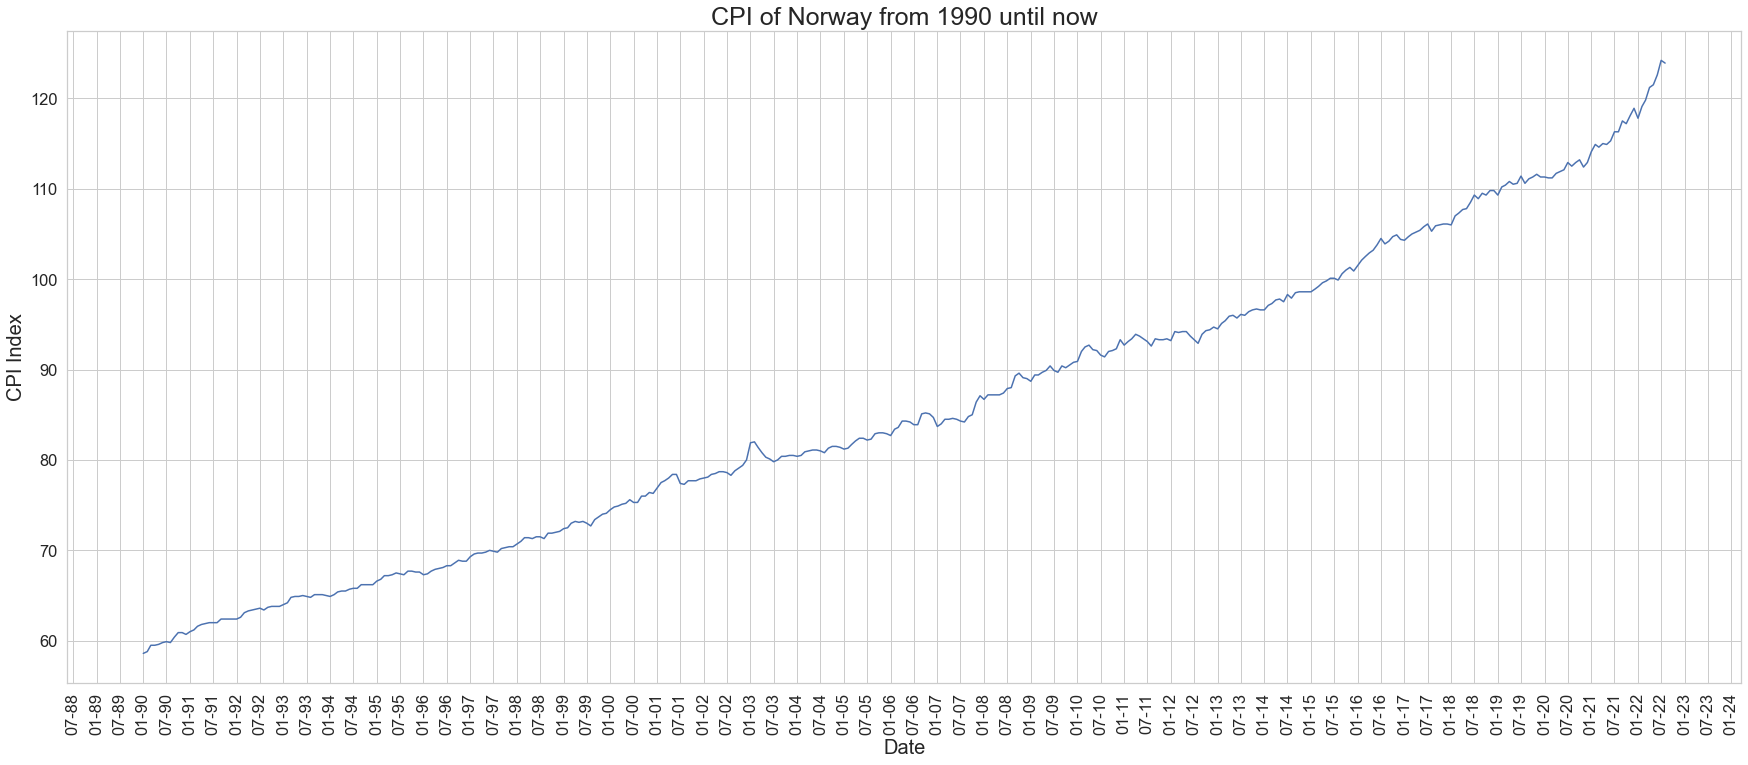

In [9]:
fig, ax = plt.subplots(figsize=(30, 12))
sns.set(font_scale=1.5, style="whitegrid")
plt.plot(df.index, df[country])

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontdict=dict(size=20))
plt.ylabel('CPI Index', fontdict=dict(size=20))
plt.title(f'CPI of {country} from 1990 until now', fontdict=dict(size=25))
plt.savefig(os.path.join('images', 'original-ts.png'))
plt.show()


In a first analysis of the time series (TS), it's clearly seen a increasing trend of the CPI values over time. On a closer look, the TS appears to have a repetition (seasonality) every 6 months. With the increasing trend and seasonality every 6-months, it can be concluded that the original TS is not stationary. Therefore, it should be transformed to become stationary in order to apply forecasting models.

From the TS, it can also be concluded that there is and rapid increasing in the last 2-3 years, which will impact the final results as this exponential increasing is just the final part of the TS

## Divide the time series into train and test

In [10]:
train_ratio = 0.8
split_index = int(len(df) * train_ratio)

# Split the time series data
train_data = df[:split_index]
test_data = df[split_index:]
months_dates = months = np.arange(len(df))
months = months_dates[:split_index]
months_test = months_dates[split_index:]

In [11]:
ts = train_data[country]
ts_test = test_data[country]

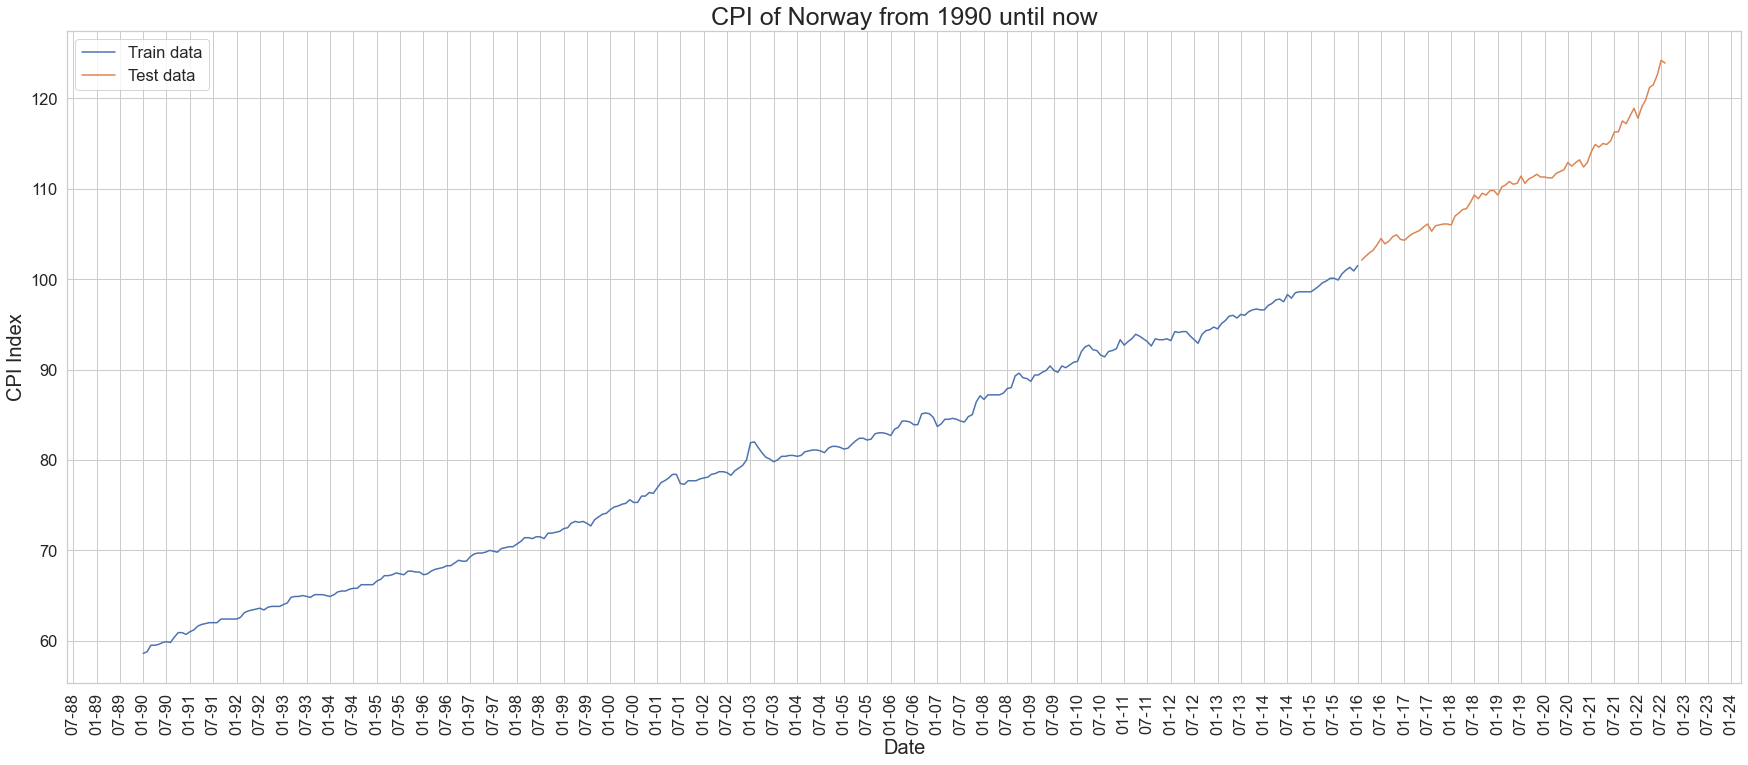

In [12]:
fig, ax = plt.subplots(figsize=(30, 12))
sns.set(font_scale=1.5, style="whitegrid")
plt.plot(ts.index, ts, label='Train data')
plt.plot(ts_test.index, ts_test, label='Test data')
plt.legend()
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)

# Ensure a major tick for each week using (interval=1) 
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontdict=dict(size=20))
plt.ylabel('CPI Index', fontdict=dict(size=20))
plt.title(f'CPI of {country} from 1990 until now', fontdict=dict(size=25))
plt.savefig(os.path.join('images', 'ts-train-test.png'))
plt.show()

## Check if it has missing values

In [13]:
print('Null values [Train data] -', ts.isnull().any())
print('Null values [Test data] -', ts_test.isnull().any())

Null values [Train data] - False
Null values [Test data] - False


## First look at stationary by statistical test

The Dickey-Fuller (DF) unit root test is a statistical test that assesses the existence of this unit root. The test null and alternative hypotheses are:
  - H0 (𝜙 = 1): a unit root is present in a time series sample (non-stationary TS) 
  - H1 (𝜙 < 1): a unit root is not present in a time series sample (stationary TS)

In [14]:
adf_test(ts)

ADF Statistic: 0.998852
p-value: 0.994254
Critical Values:
	1%: -3.452
	5%: -2.871
	10%: -2.572


Since the p-value from the DF test is higher than 0.05, the null hypothesis cannot be rejected, meaning that the original TS is non-stationary.

## Decomposition models

As the magnitude of the time series (TS) does not seem to change over time, it will be used an additive model

    x(n) = tr(n) + sn(n) + e(n)

 tr - trend component
 sn - seasonal component
 e = erratic component

## Check trend

In [15]:
T = 12 # period

In [16]:
## trend
coefs_1d = np.polyfit(months, np.array(ts), deg=1)
values_1d = np.polyval(coefs_1d, months)
ts_1d = pd.Series(values_1d, index=ts.index, name='Linear Fit')

coefs_2d = np.polyfit(months, np.array(ts), deg=2)
values_2d = np.polyval(coefs_2d, months)
ts_2d = pd.Series(values_2d, index=ts.index, name='Quadratic Fit')

coefs_3d = np.polyfit(months, np.array(ts), deg=3)
values_3d = np.polyval(coefs_3d, months)
ts_3d = pd.Series(values_3d, index=ts.index, name='Cubic Fit')

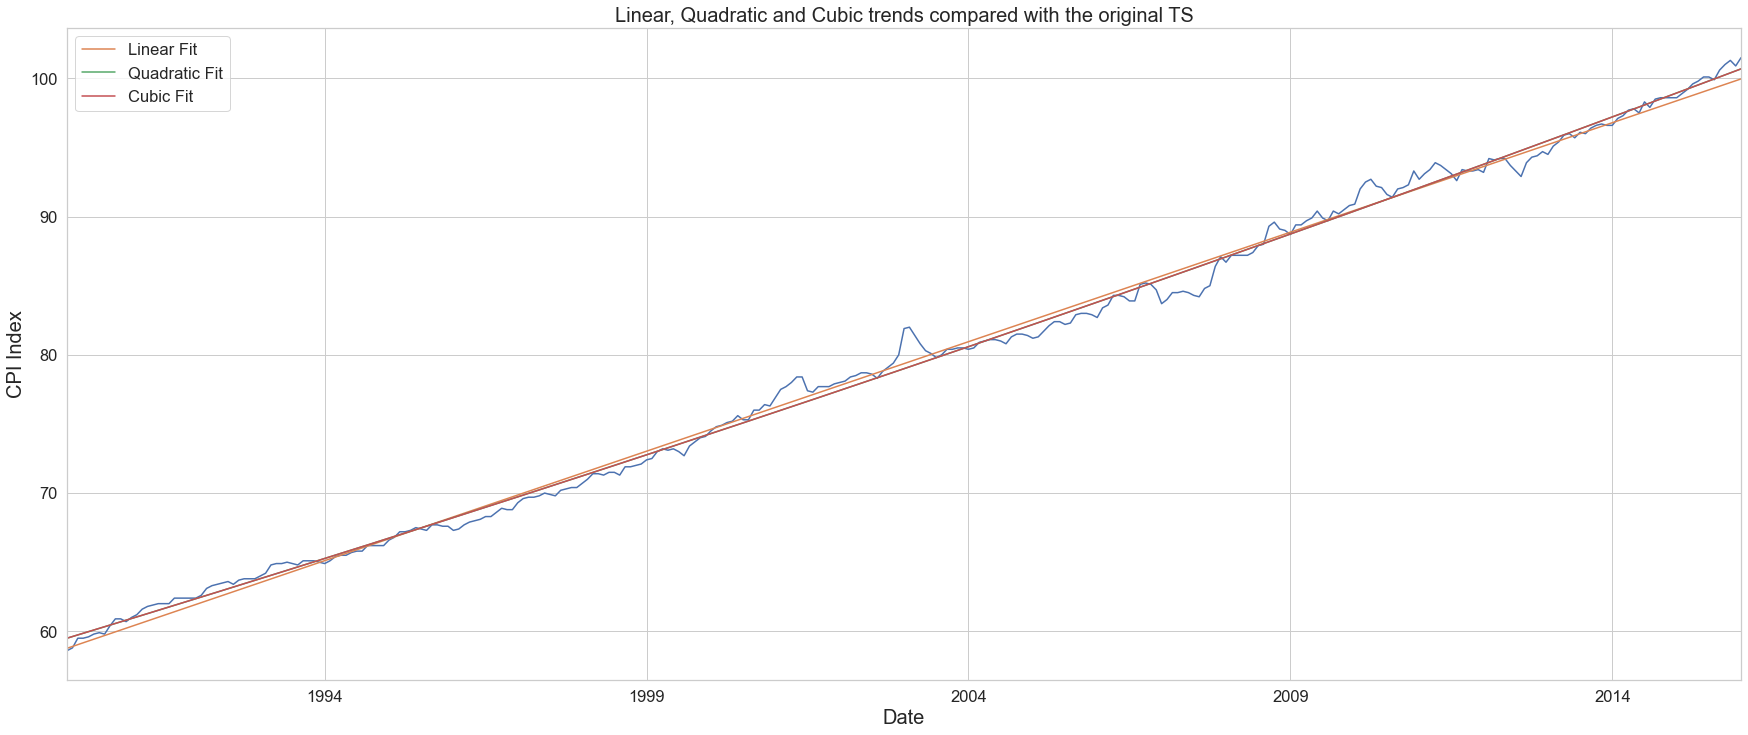

In [17]:
ax = ts.plot(figsize=(30, 12))
ts_1d.plot(ax=ax, legend=True)
ts_2d.plot(ax=ax, legend=True)
ts_3d.plot(ax=ax, legend=True)
ax.set_xlabel('Date', fontdict=dict(size=20))
ax.set_ylabel('CPI Index', fontdict=dict(size=20))
ax.set_title('Linear, Quadratic and Cubic trends compared with the original TS', fontdict=(dict(size=20)))
plt.savefig(os.path.join('images', 'trends-plot.png'))
plt.show()

After analyzing the results of plotting the original time series (TS) against the linear, quadratic and cubic trends, it was observed that there isn't a great difference in them, so it was chosen the linear trend since it is simpler.

In [18]:
trend = ts_1d
trend_adjusted = ts - trend
trend_adjusted.name = 'Trend Adjusted'

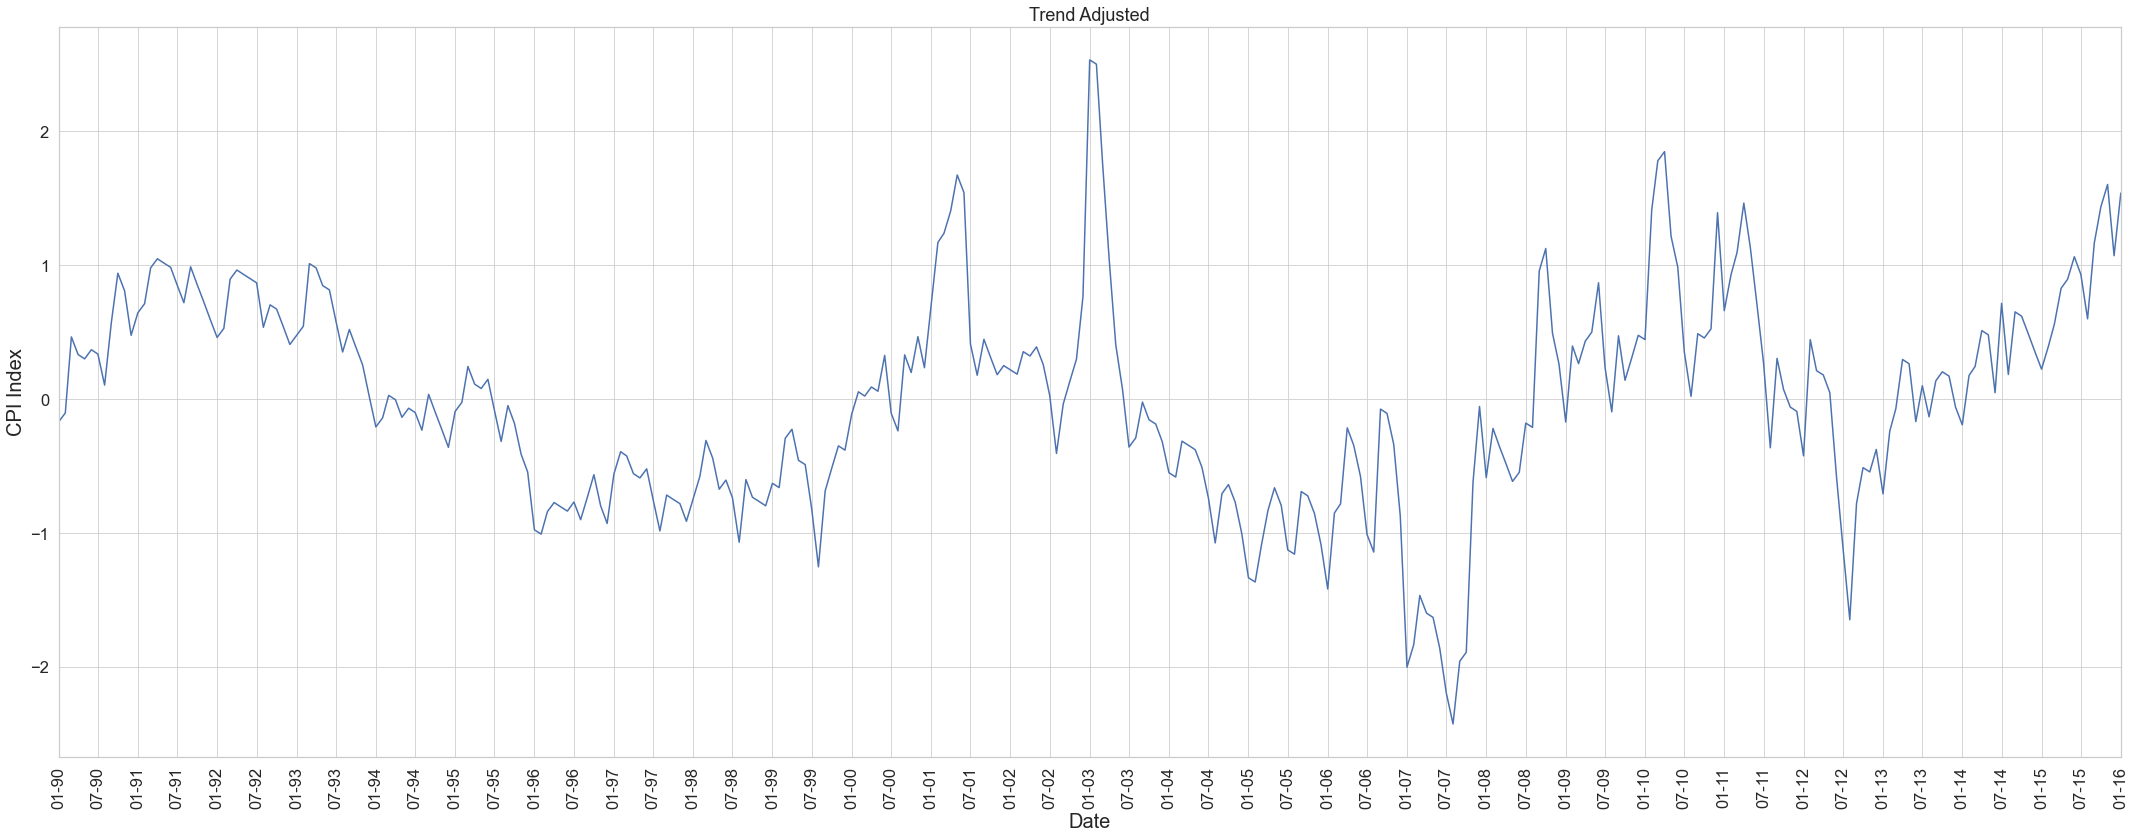

In [19]:
fig, axs = plt.subplots(1,figsize=(30, 12))

axs.plot(trend_adjusted.index, trend_adjusted)
axs.set_ylabel('CPI Index')
axs.set_title('Trend Adjusted TS')
date_form = DateFormatter("%m-%y")
axs.xaxis.set_major_formatter(date_form)
axs.grid(True)
axs.grid(which='minor', alpha=0.3)
axs.grid(which='major', alpha=0.8)
axs.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
axs.set_xlim(ts.index[0], ts.index[-1])
plt.xticks(rotation='vertical')
plt.xlabel('Date', fontdict=dict(size=20))
plt.ylabel('CPI Index', fontdict=dict(size=20))
axs.set_title('Trend Adjusted')
plt.savefig(os.path.join('images', 'trend-adjusted.png'))
plt.tight_layout()
plt.show()

After adjusting the TS to the trend, the seasonal patterns appear more clearly. Each 6-month interval contains a peak more or less in the middle. At the same time, it can be seen a bigger pattern that repeat each +-7 years.

## Seasonality

In [20]:
minor_ticks = np.linspace(0, 6, 61)

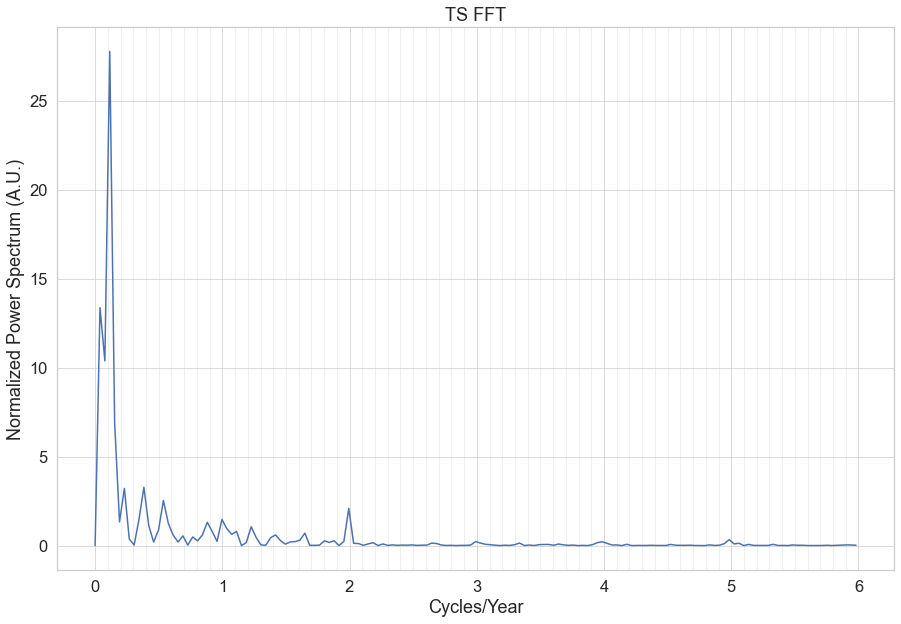

In [21]:
fTS=(np.abs(np.fft.rfft(trend_adjusted-trend_adjusted.mean()))**2/trend_adjusted.size)
sample_freq = 12 # 12 samples per year

f = np.fft.rfftfreq(trend_adjusted.size, d=1/sample_freq)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(f,fTS)
ax.set_xticks(minor_ticks, minor=10)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=0.7)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")
plt.title('TS FFT')
plt.savefig(os.path.join('images', 'original_ts_fft.png'))
plt.show()

Analyzing the frequency distributions, it can confirm the previous seasonality patterns observed ever each 6 months and every 5 years, not the previous 7 years. However, it also appeared new patters every month and every 3 months and every 2 years.

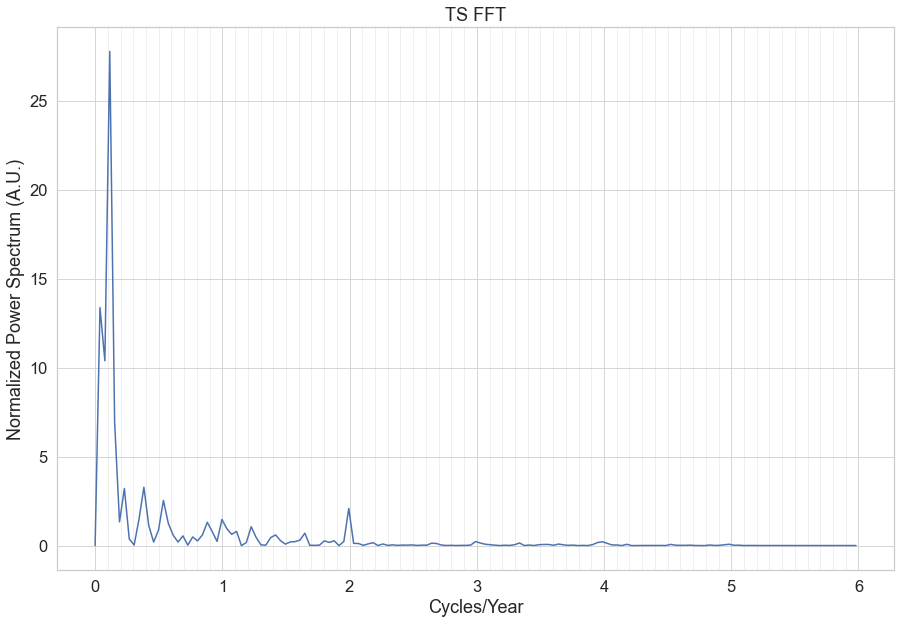

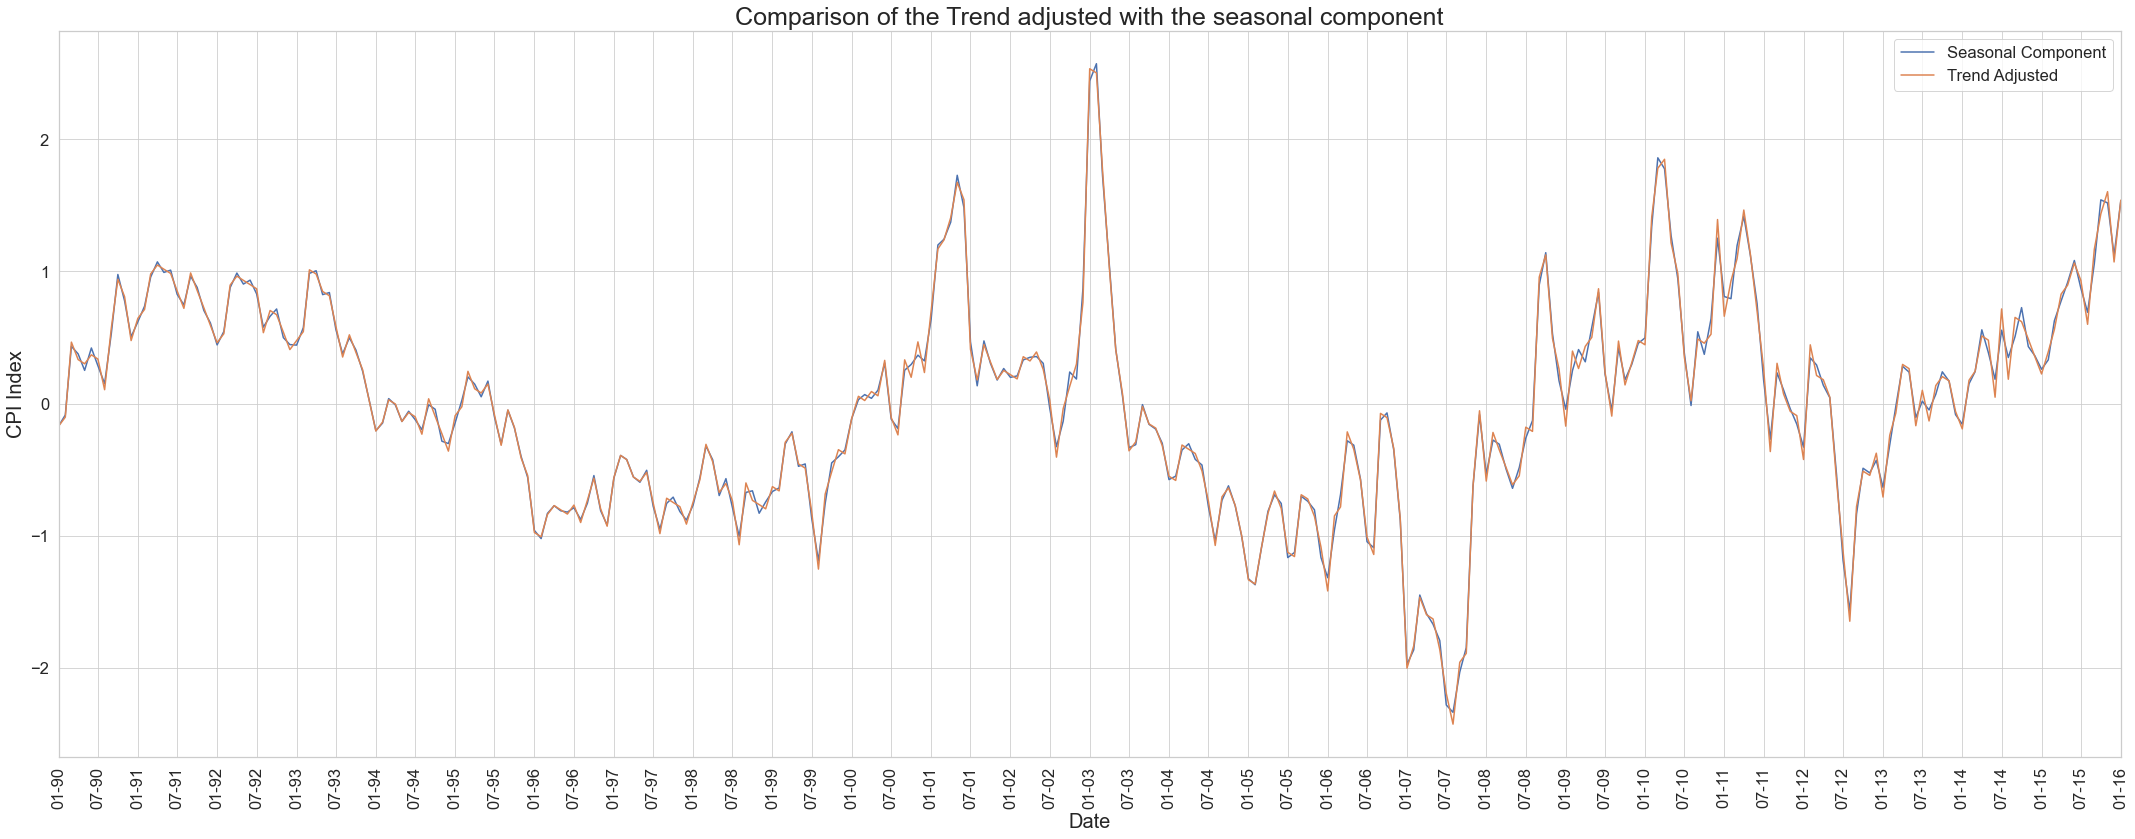

In [22]:
sos = scs.butter(N=5, fs=sample_freq, Wn=[5], btype='lowpass', output='sos')
seasonal = scs.sosfiltfilt(sos, trend_adjusted)
#Lets look at the filter effect
fTS=(np.abs(np.fft.rfft(seasonal-np.mean(seasonal)))**2/trend_adjusted.size)# Mean was subtracted because 

f = np.fft.rfftfreq(trend_adjusted.size, d=1/sample_freq)

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(f,fTS)
ax.set_xticks(minor_ticks, minor=10)
ax.grid(which='both')
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=0.8)
plt.xlabel("Cycles/Year")
plt.ylabel("Normalized Power Spectrum (A.U.)")
plt.title('TS FFT')
plt.savefig(os.path.join('images', 'filtered_ts_fft.png'))
plt.show()


seasonal_ts = pd.Series(data=seasonal, index=ts.index, name='Seasonal Component')

fig, ax = plt.subplots(1, figsize=(30, 12))
ax.plot(seasonal_ts.index, seasonal_ts, label='Seasonal Component')
ax.plot(trend_adjusted.index, trend_adjusted, label='Trend Adjusted')
plt.legend()
date_form = DateFormatter("%m-%y")
ax.xaxis.set_major_formatter(date_form)
ax.grid(which='minor', alpha=0.3)
ax.grid(which='major', alpha=0.8)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
ax.set_xlim(seasonal_ts.index[0], seasonal_ts.index[-1])
plt.xlabel('Date', fontdict=(dict(size=20)))
plt.ylabel('CPI Index', fontdict=(dict(size=20)))
plt.title('Comparison of the Trend adjusted with the seasonal component', fontdict=(dict(size=25)))
plt.tight_layout()
plt.savefig(os.path.join('images', 'seasonality_adjusted.png'))
plt.show()


In [23]:
# remove seasonality
trend_seasonal_adjusted = trend_adjusted - seasonal_ts
trend_seasonal_adjusted.name = 'Trend and seasonality adjusted'

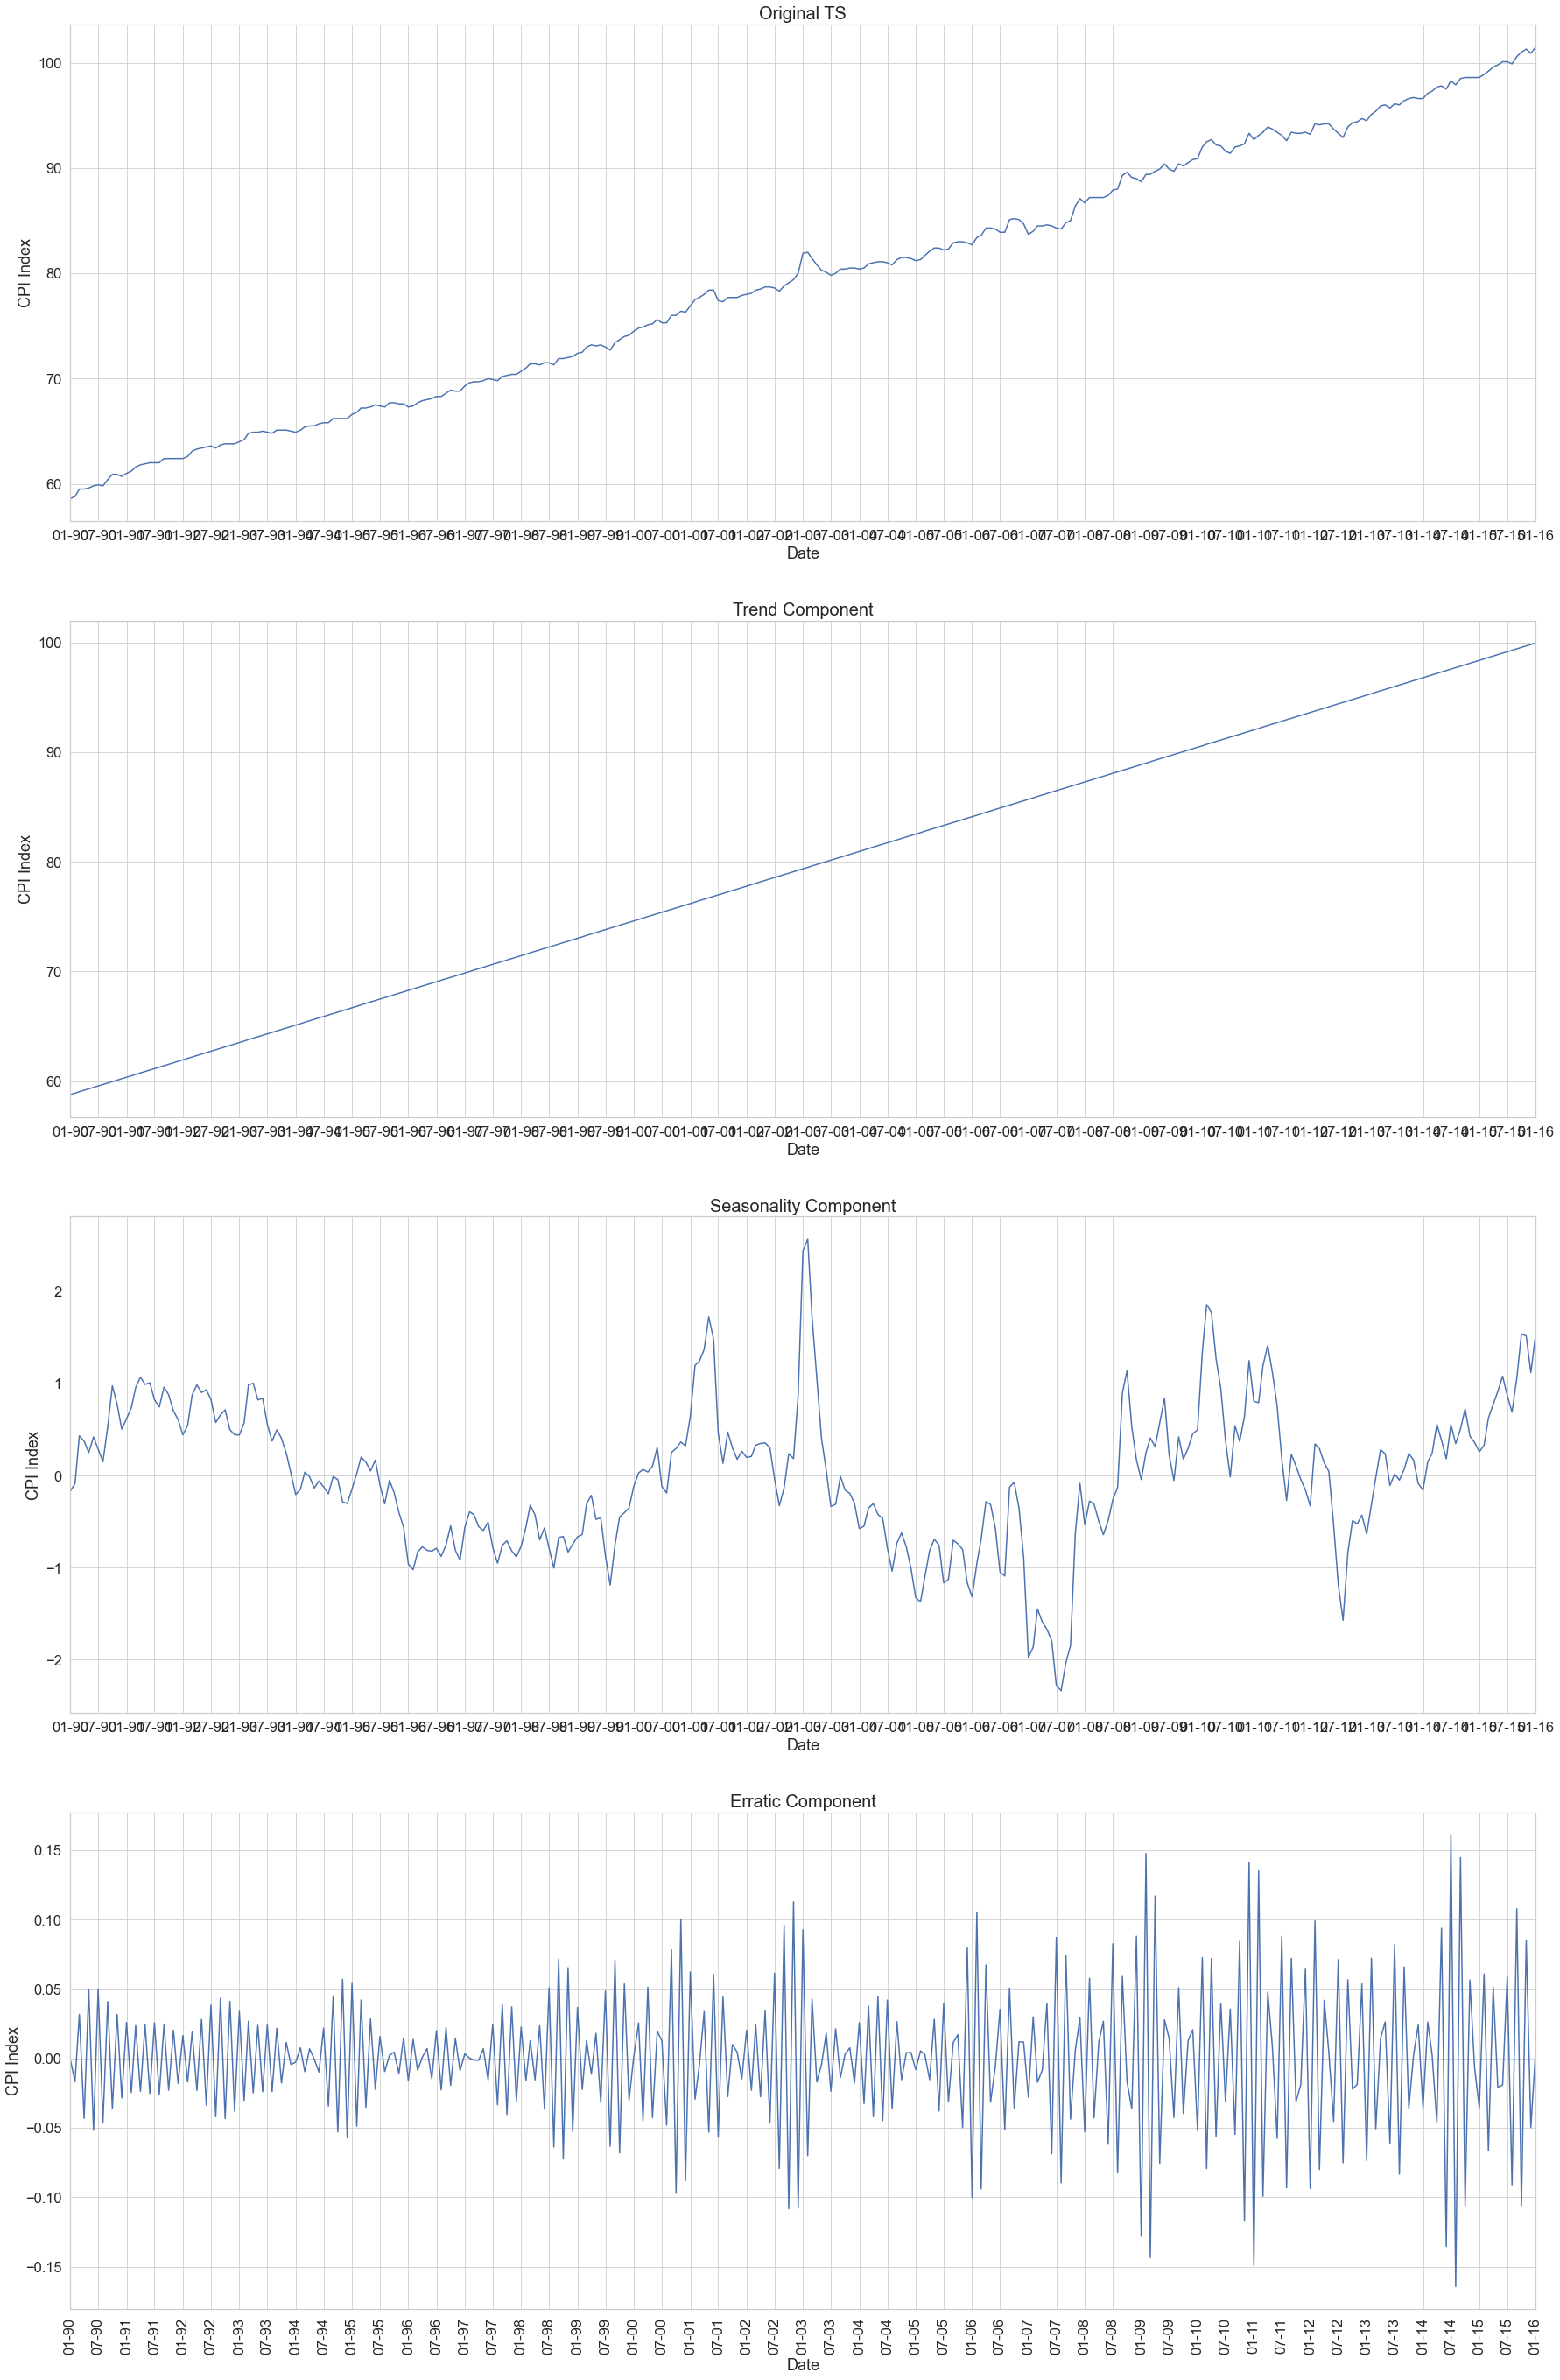

In [24]:
fig, axs = plt.subplots(4, 1, figsize=(30, 12*4))
axs[0].plot(ts.index, ts)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('CPI Index')
axs[0].set_title('Original TS', fontdict=dict(size=20))
date_form = DateFormatter("%m-%y")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].grid(which='minor', alpha=0.3)
axs[0].grid(which='major', alpha=0.8)
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
axs[0].set_xlim(ts.index[0], ts.index[-1])

axs[1].plot(trend.index, trend)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('CPI Index')
axs[1].set_title('Trend Component', fontdict=dict(size=20))
date_form = DateFormatter("%m-%y")
axs[1].xaxis.set_major_formatter(date_form)
axs[1].grid(which='minor', alpha=0.3)
axs[1].grid(which='major', alpha=0.8)
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
axs[1].set_xlim(trend.index[0], trend.index[-1])

axs[2].plot(seasonal_ts.index, seasonal_ts)
axs[2].set_xlabel('Date')
axs[2].set_ylabel('CPI Index')
axs[2].set_title('Seasonality Component', fontdict=dict(size=20))
date_form = DateFormatter("%m-%y")
axs[2].xaxis.set_major_formatter(date_form)
axs[2].grid(which='minor', alpha=0.3)
axs[2].grid(which='major', alpha=0.8)
axs[2].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
axs[2].set_xlim(seasonal_ts.index[0], seasonal_ts.index[-1])

axs[3].plot(trend_seasonal_adjusted.index, trend_seasonal_adjusted)
axs[3].set_xlabel('Date')
axs[3].set_ylabel('CPI Index')
axs[3].set_title('Erratic Component', fontdict=dict(size=20))
date_form = DateFormatter("%m-%y")
axs[3].xaxis.set_major_formatter(date_form)
axs[3].grid(which='minor', alpha=0.3)
axs[3].grid(which='major', alpha=0.8)
axs[3].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xticks(rotation='vertical')
axs[3].set_xlim(trend_seasonal_adjusted.index[0], trend_seasonal_adjusted.index[-1])
plt.savefig(os.path.join('images', 'additive_model_components.png'))
plt.show()

## Trend and seasonal removal by differentiation

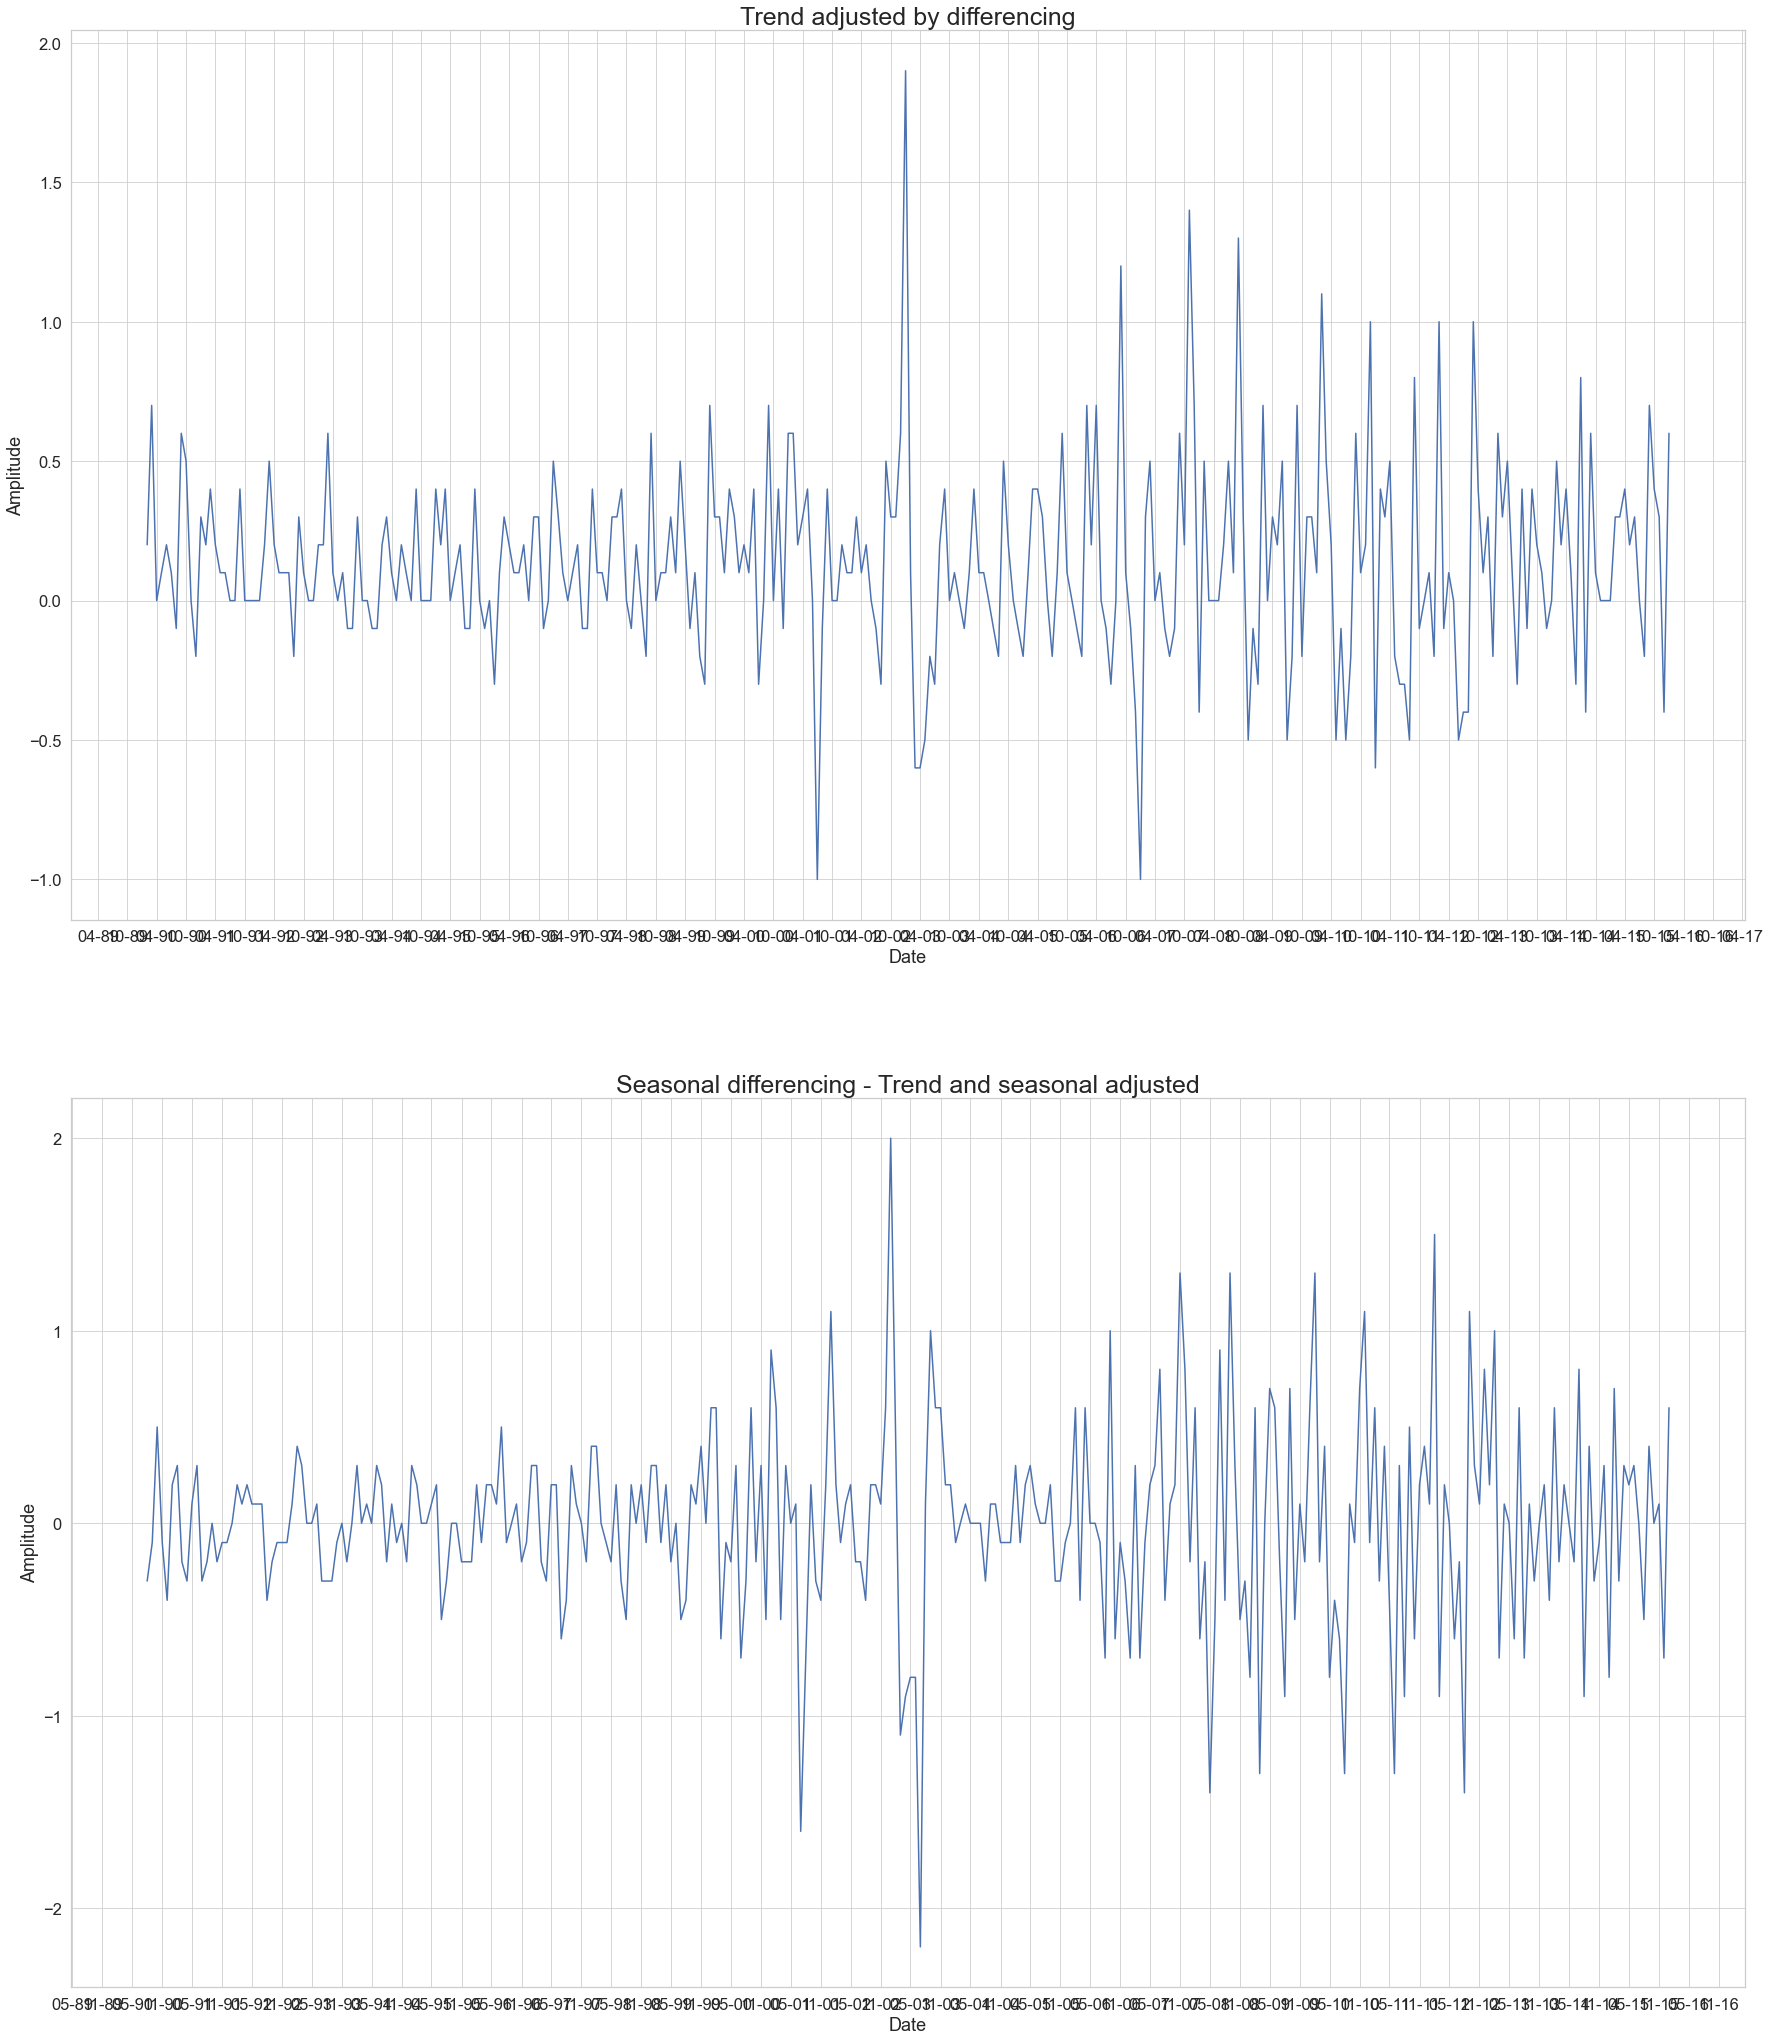

In [25]:
trend_adjusted_diff = ts.diff()
# TODO: check which period to use

trend_seasonal_adjusted_diff = trend_adjusted_diff.diff(6) # because T = 12, samples colleted each month and yearly

fig, axs = plt.subplots(2, 1, figsize=(30, 12*3))

axs[0].plot(trend_adjusted_diff.index, trend_adjusted_diff)
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Amplitude')
axs[0].set_title('Trend adjusted by differencing', fontdict=dict(size=25))
date_form = DateFormatter("%m-%y")
axs[0].xaxis.set_major_formatter(date_form)
axs[0].grid(which='minor', alpha=0.3)
axs[0].grid(which='major', alpha=0.8)
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=6))

axs[1].plot(trend_seasonal_adjusted_diff.index, trend_seasonal_adjusted_diff)
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Amplitude')
axs[1].set_title('Seasonal differencing - Trend and seasonal adjusted', fontdict=dict(size=25))
date_form = DateFormatter("%m-%y")
axs[1].xaxis.set_major_formatter(date_form)
axs[1].grid(which='minor', alpha=0.3)
axs[1].grid(which='major', alpha=0.8)
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.savefig(os.path.join('images', 'trend_seasonal_by_diff.png'))
plt.show()

## Statistical test to check stationary

### Trend and seasonal adjusted by model-fitting and filtering

In [26]:
adf_test(trend_seasonal_adjusted)

ADF Statistic: -21.999200
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572


Based on the ADF test, given the p-value of 0.0, the transformed TS is stationary.

### Trend and seasonal adjusted by differencing

In [27]:
adf_test(trend_seasonal_adjusted_diff.dropna())

ADF Statistic: -8.939597
p-value: 0.000000
Critical Values:
	1%: -3.453
	5%: -2.871
	10%: -2.572


By the Dickey-Fuller test, after differencing the resulted TS is stationary. However, the ADF statistic most closer to the critical values than when the TS is decomposed by model-fitting and filtering. 

## ACS to see stationary

In [28]:
def auto_covarience_aux(ts, T=0):
    N = len(ts)
    mean = ts.mean()
    cov_coef = 0
    for n in range(N-T-1): ## Não estaremos a retirar um a mais
        cov_coef += (ts[n] - mean) * (ts[n+T]-mean)
    return cov_coef / N


def auto_covarience(ts, T=0):
    return auto_covarience_aux(ts, T) / auto_covarience_aux(ts)


def correlogram(ts, max_T, twoside=False):
    N = len(ts)
    if twoside:
        corrl = np.zeros(2 * max_T + 1)
        index = np.arange(max_T + 1)
        index = np.concatenate((-np.flip(index[1:]), index), axis=0)
    else:
        corrl = np.zeros(max_T)
        index = np.arange(max_T)

    for i in range(max_T):
        if twoside:
            corrl[max_T + i] = auto_covarience(ts, i)
            corrl[max_T - i] = corrl[max_T + 1]
        else:
            corrl[i] = auto_covarience(ts, i)
    
    d = {'ACS':corrl, 'upper_CB':np.ones(max_T)*(1.96/np.sqrt(N)),'lower_CB':-np.ones(max_T)*(1.96/np.sqrt(N))}
    return pd.DataFrame(data=d, index=index)

In [30]:
def plot_correlogram(ts, title):
    corrl = correlogram(ts, len(ts))
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    ax.stem(corrl.index, corrl.ACS, label='ACS')
    ax.plot(corrl.index, corrl.upper_CB, linestyle='--', color='r', linewidth=2, label='+/-1.96/sqrt(N)'),
    ax.plot(corrl.index, corrl.lower_CB, linestyle='--', color='r', linewidth=2),
    plt.title(title, fontdict=dict(size=25))
    plt.legend()
    plt.ylabel('Autocorrelation')
    plt.xlabel('T')

/var/folders/7x/f99kq48n5_7cdmmy6sz268nw0000gn/T/ipykernel_26125/2600244812.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  cov_coef += (ts[n] - mean) * (ts[n+T]-mean)


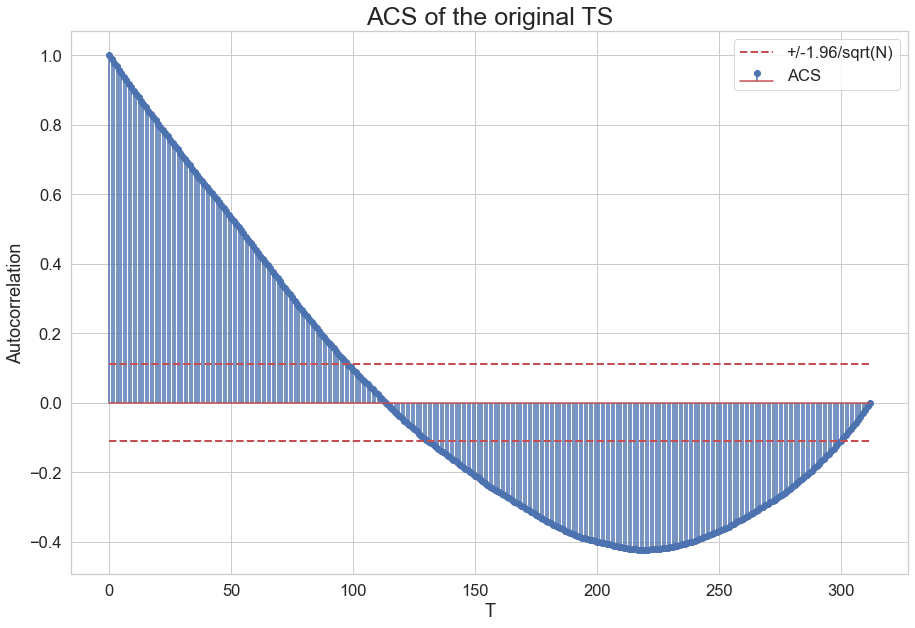

In [31]:
plot_correlogram(ts, 'ACS of the original TS')

From the ACS plot, it can be confirm the previous claim that the original time series isn't stationary as the ACS have significant values for T > 0, using a significance level of 95%.

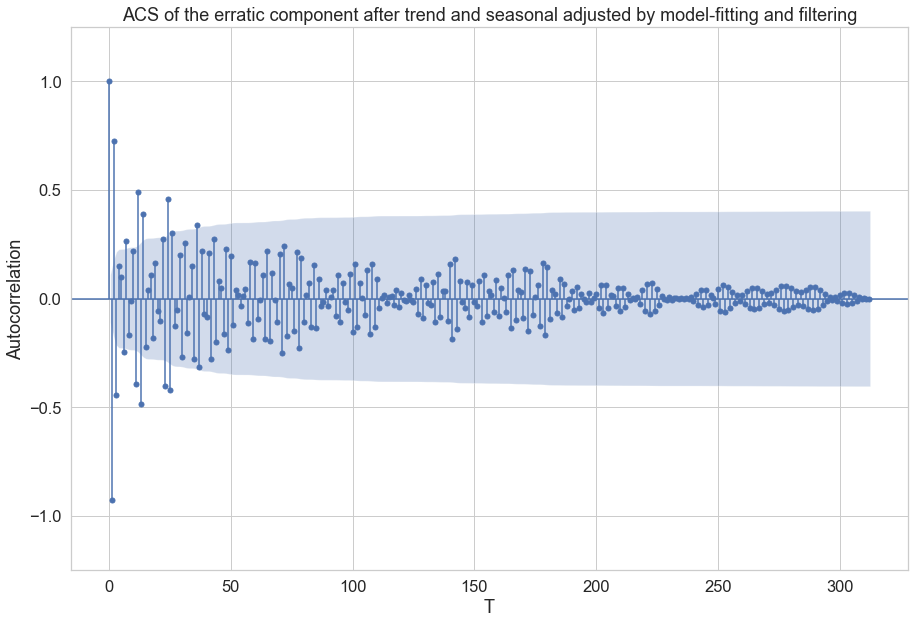

In [76]:
# plot_correlogram(trend_seasonal_adjusted, 'Erratic Component after trend and seasonality adjusted by model-fitting and filtering')
fig, ax = plt.subplots(1, figsize=(15, 10))
plot_acf(trend_seasonal_adjusted, alpha=0.05, ax=ax, lags=len(trend_seasonal_adjusted)-1)
plt.ylabel('Autocorrelation')
plt.xlabel('T')
ax.set_ylim([-1.25, 1.25])
plt.title('ACS of the erratic component after trend and seasonal adjusted by model-fitting and filtering')
plt.savefig(os.path.join('images', 'acs_additive_model.png'))
plt.show()


It can be seen that there is a rapid decreasing the the ACS, which indicates that the erratic component is stationary. From the graph, it's clear that the data was not generated with a Moving-Average (MA) linear process, as the first lags does not decay to non-significant autocorrelation values. As the ACS seem to exponential decay to zero, the Autoregressive (AR) Process could be the winner. However, it should be noted that its difficult with this plot to determine which linear-process to use (AR or ARMA) and its order, so a more extensive study should be used to determine it.

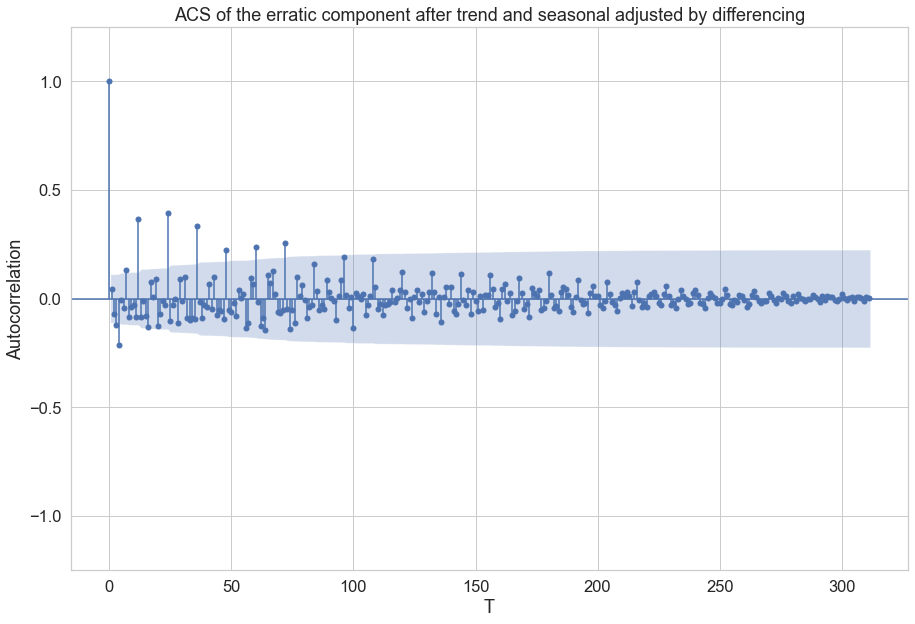

In [77]:
# plot_correlogram(trend_seasonal_adjusted_diff.dropna(), 'Erratic Component after differencing')
fig, ax = plt.subplots(1, figsize=(15, 10))
plot_acf(trend_adjusted_diff.dropna(), alpha=0.05, ax=ax, lags=len(trend_adjusted_diff.dropna())-1)
plt.ylabel('Autocorrelation')
plt.xlabel('T')
ax.set_ylim([-1.25, 1.25])
plt.title('ACS of the erratic component after trend and seasonal adjusted by differencing')
plt.savefig(os.path.join('images', 'acs_differencing.png'))
plt.show()


Similar to the model-fitting and filtering transformations that transform the TS into stationary, using differencing, the ACS aslo decay rapid to non-significant values, which indicates the TS is not stationary.

## Assessing the underlying process of the stationary TS

From the ACS analysis, it was concluded that the underlying process of the TS is not the MA. Therefore, as the ACS graphs doesn't gives more information about the problem, it should be tested the Partial Autocorrelation Sequence (PACS).

### PACS

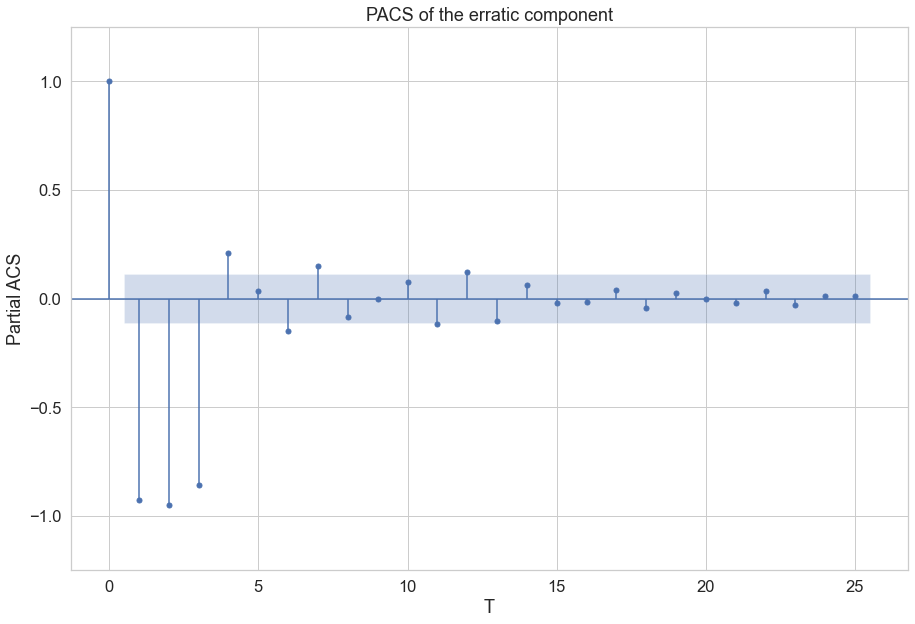

In [78]:
fog, ax = plt.subplots(1, figsize=(15, 10))
plot_pacf(trend_seasonal_adjusted, alpha=0.05, ax=ax)
ax.set_ylim([-1.25, 1.25])
plt.xlabel('T')
plt.ylabel('Partial ACS')
plt.title('PACS of the erratic component')
plt.savefig(os.path.join('images', 'pacs_plot.png'))
plt.show()

Looking at the PACS graph, it can be concluded that it should be use a AR model of order 3 from the problem, aas there are clearly 3 significant autocorrelation values. 

In [71]:
def pacs(serie,max_lag=25):
    N=serie.size
    pcorrl=np.zeros(max_lag+1)
    ix=np.array(range(max_lag+1))
    pcorrl[0]=1
    for p in range(1,max_lag+1):
        model = ARIMA(serie, order=(p,0,0))
        model_fit = model.fit()
        pcorrl[p]=model_fit.arparams[-1]
        
    d = {'PACS':pcorrl, 'upsig':np.ones(max_lag+1)*(1.96/np.sqrt(N)),'dnsig':-np.ones(max_lag+1)*(1.96/np.sqrt(N))}
    corrl=pd.DataFrame(data=d,index=ix)
    return corrl

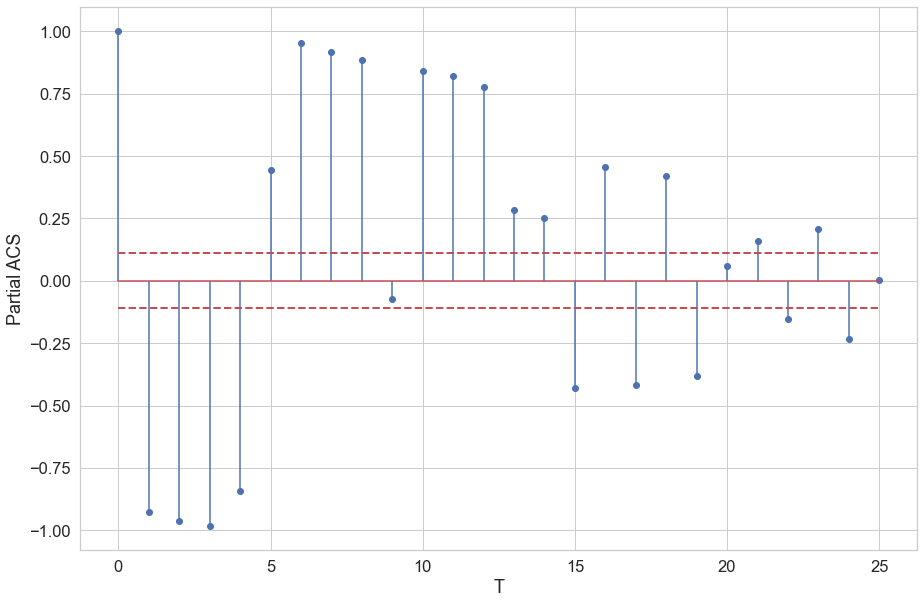

In [74]:
pcorrl = pacs(trend_seasonal_adjusted)
fig, ax = plt.subplots(1, figsize=(15, 10))
ax.stem(pcorrl.index,pcorrl['PACS'])
ax.plot(pcorrl.index,pcorrl['upsig'],linestyle='--', color='r', linewidth=2)
ax.plot(pcorrl.index,pcorrl['dnsig'],linestyle='--', color='r', linewidth=2)
plt.xlabel('T')
plt.ylabel('Partial ACS')
plt.show()

### By the residuals error

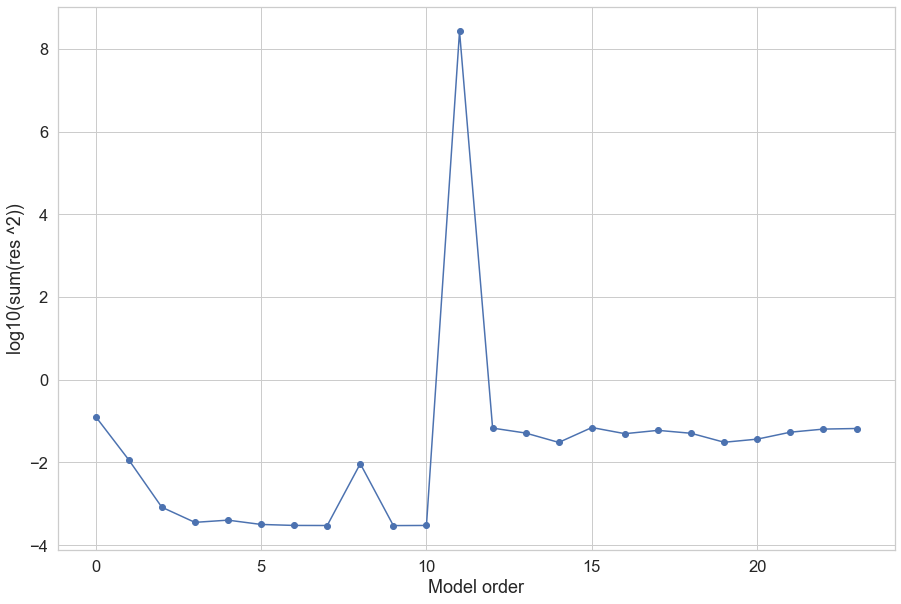

In [82]:
max_order = 25
residuals_error = np.zeros(max_order-1)
for order in range(max_order-1):
    model = ARIMA(trend_seasonal_adjusted, order=(order+1, 0, 0))
    model_fit = model.fit()
    residuals_error[order] = np.sum(model_fit.resid**2)
plt.figure(figsize=(15, 10))
plt.plot(np.log10(residuals_error), marker='o')
plt.xlabel('Model order')
plt.ylabel('log10(sum(res ^2))')
plt.show()

## Calculating the coefficients of the AR model

Using the AR model, the parameter estimations can be calculated based on the Yule-Walker equations
$\\\underbrace{\left[\begin{array}{c}\rho_{XX}(1)\\\rho_{XX}(2)\\\vdots\\\rho_{XX}(p)\end{array}\right]}_{\mathbf{r}}=\underbrace{\left[\begin{array}{lllcl}1&\rho_{XX}(1)&\rho_{XX}(2)&\cdots&\rho_{XX}(p-1)\\\rho_{XX}(1)&1&\rho_{XX}(1)&\cdots&\rho_{XX}(p-2)\\\vdots&\vdots&\vdots&&\vdots\\\rho_{XX}(p-1)&\rho_{XX}(p-2)&\rho_{XX}(p-3)&\cdots&1\end{array}\right]}_{\mathbf{R}}\underbrace{\left[\begin{array}{c}\alpha_1\\\alpha_2\\\vdots\\\alpha_p\end{array}\right]}_{\mathbf{\phi}}$

To calculate the paramters $\mathbf{\phi}$, it just a matricial operation of  $\mathbf{\phi}=\mathbf{R^{-1}}\mathbf{r}$

In [84]:
# estimate parameters

order = 3
ACS = acf(trend_seasonal_adjusted, nlags=order)
R = np.zeros((order, order))
R[0, :] = ACS[0:-1]

for i in range(order):
    for j in range(order):
        R[i,j] = ACS[j-i]
        R[j,i] = ACS[j-i]
phi = np.dot(np.linalg.inv(R), ACS[1:].T)

In [85]:
print('Estimated parameters:, ', phi)

Estimated parameters:,  [-1.15337802  0.48350777  0.6078516 ]


From the estimated parameters, the AR process can be described as:

    X(N) = -1.1534 * X(n-1) + 0.4835 * X(n-1) + 0.6079 * X(n-3) + Z(n)